In [1]:
DATA_PATH = '../data/train.csv'

In [2]:
import pandas as pd

raw_data = pd.read_csv(DATA_PATH)
raw_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
import numpy as np
import matplotlib.pyplot as plt

def plot_digit(digit, rows, images_per_row, plot_index, title=None):
    digit_2d = digit.reshape((28, 28))
    plt.subplot(rows, images_per_row, plot_index)
    plt.imshow(digit_2d, cmap='gray')
    plt.title(title)
    
def plot_n_digits(digits, images_per_row=3, titles=None):
    n = len(digits)  
    rows = int(np.ceil(n / images_per_row))
    
    if titles is None:
        titles = [None for i in range(n)]
        fig = plt.figure(figsize=(15, 15*rows/images_per_row))
    else:
        fig = plt.figure(figsize=(15, 20*rows/images_per_row))
    
    for i in range(n):
        digit = digits[i, :]
        plot_index = i+1
        plot_digit(digit, rows, images_per_row, plot_index, titles[i])
    
    plt.show()

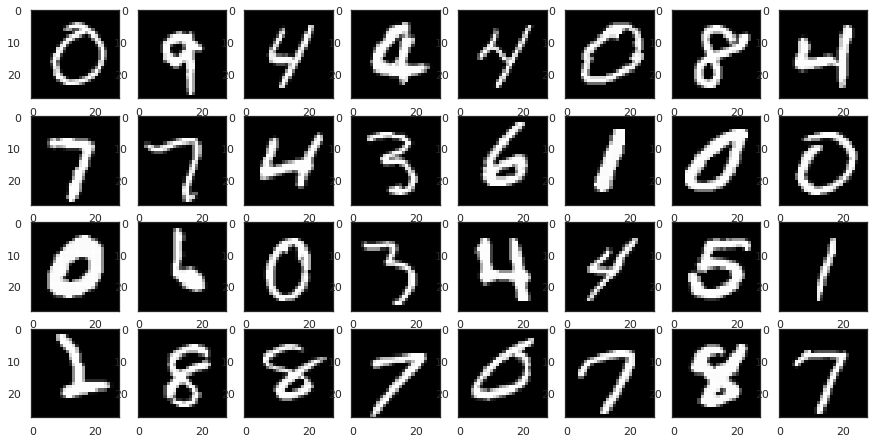

In [173]:
data_sample = raw_data.sample(32).loc[:, 'pixel0':].values
plot_n_digits(data_sample, images_per_row=8)

In [5]:
labels = raw_data.loc[:, 'label']
digits = raw_data.loc[:, 'pixel0':]

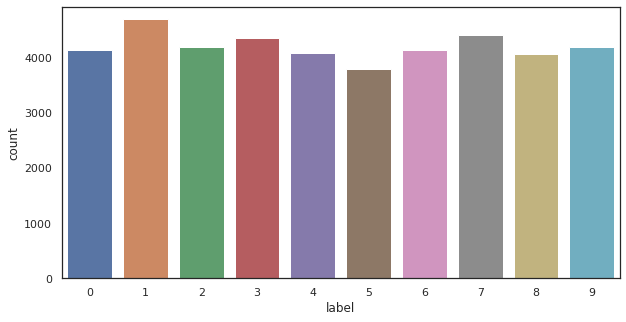

In [176]:
import seaborn as sns

fig = plt.figure(figsize=(10, 5))
sns.countplot(labels)

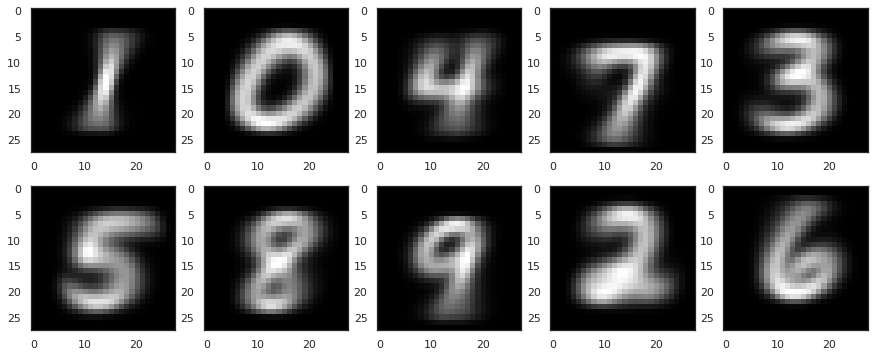

In [140]:
unique_labels = labels.unique()
mean_digits = []

for unique_label in unique_labels:
    indices = labels.index[labels == unique_label]   
    values = raw_data.loc[indices, :]
    mean_digit = values.mean()
    mean_digits.append(mean_digit)
    
mean_digits = pd.DataFrame(mean_digits).loc[:, 'pixel0':].values
plot_n_digits(mean_digits, images_per_row=5)

In [102]:
from sklearn.model_selection import train_test_split

# Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(digits, labels, test_size=0.2)

# Reshape the data into 2-dimensional images (with a third empty dimension for color)
x_train = x_train.values
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
y_train = y_train.values

x_test = x_test.values
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_test = y_test.values

# Scale the data such that values are between 0 and 1
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

In [116]:
import tensorflow as tf

In [104]:
data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
                        rotation_range=5, 
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=0.1)

data_aug.fit(x_train)

In [109]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [110]:
cnn_model_reg = tf.keras.models.clone_model(cnn_model)
loss_fn_cnn_reg = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt_reg = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_model_reg.compile(optimizer=opt_reg, loss=loss_fn_cnn_reg, metrics=['accuracy'])

In [113]:
cnn_model_lrs = tf.keras.models.clone_model(cnn_model)
loss_fn_cnn_lrs = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt_lrs = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_model_lrs.compile(optimizer=opt_lrs, loss=loss_fn_cnn_lrs, metrics=['accuracy'])

In [123]:
cnn_model_aug = tf.keras.models.clone_model(cnn_model)
loss_fn_cnn_aug = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt_aug = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_model_aug.compile(optimizer=opt_aug, loss=loss_fn_cnn_aug, metrics=['accuracy'])

In [112]:
cnn_reg_history = cnn_model_reg.fit(x_train, y_train, batch_size=32, 
                                    epochs=30, 
                                    validation_data=(x_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 24s 716us/sample - loss: 0.4026 - accuracy: 0.8654 - val_loss: 0.1088 - val_accuracy: 0.9660
Epoch 2/30
33600/33600 [==============================] - 24s 724us/sample - loss: 0.1400 - accuracy: 0.9563 - val_loss: 0.0600 - val_accuracy: 0.9812
Epoch 3/30
33600/33600 [==============================] - 24s 721us/sample - loss: 0.1069 - accuracy: 0.9658 - val_loss: 0.0537 - val_accuracy: 0.9843
Epoch 4/30
33600/33600 [==============================] - 28s 826us/sample - loss: 0.0926 - accuracy: 0.9706 - val_loss: 0.0515 - val_accuracy: 0.9843
Epoch 5/30
33600/33600 [==============================] - 25s 732us/sample - loss: 0.0884 - accuracy: 0.9720 - val_loss: 0.0434 - val_accuracy: 0.9873
Epoch 6/30
33600/33600 [==============================] - 25s 736us/sample - loss: 0.0784 - accuracy: 0.9760 - val_loss: 0.0378 - val_accuracy: 0.9877
Epoch 7/30
33600/33600 [=====================

In [119]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

In [120]:
cnn_lrs_history = cnn_model_lrs.fit(x_train, y_train, batch_size=32,
                                    epochs=30,
                                    validation_data=(x_test, y_test),
                                    callbacks=[reduce_lr])

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 25s 755us/sample - loss: 0.4064 - accuracy: 0.8665 - val_loss: 0.0952 - val_accuracy: 0.9708
Epoch 2/30
33600/33600 [==============================] - 25s 756us/sample - loss: 0.1447 - accuracy: 0.9546 - val_loss: 0.0659 - val_accuracy: 0.9785
Epoch 3/30
33600/33600 [==============================] - 28s 846us/sample - loss: 0.1079 - accuracy: 0.9668 - val_loss: 0.0503 - val_accuracy: 0.9848
Epoch 4/30
33600/33600 [==============================] - 24s 712us/sample - loss: 0.0926 - accuracy: 0.9704 - val_loss: 0.0449 - val_accuracy: 0.9865
Epoch 5/30
33600/33600 [==============================] - 23s 672us/sample - loss: 0.0826 - accuracy: 0.9735 - val_loss: 0.0425 - val_accuracy: 0.9868
Epoch 6/30
33600/33600 [==============================] - 31s 929us/sample - loss: 0.0770 - accuracy: 0.9751 - val_loss: 0.0386 - val_accuracy: 0.9873
Epoch 7/30
33600/33600 [=====================

In [124]:
reduce_lr_aug = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

cnn_aug_history = cnn_model_aug.fit(data_aug.flow(x_train, y_train, batch_size=32), 
                                    steps_per_epoch=x_train.shape[0] // 32, 
                                    epochs=30,
                                    validation_data=(x_test, y_test),
                                    callbacks=[reduce_lr_aug])

  ...
    to  
  ['...']
Train for 1050 steps, validate on 8400 samples
Epoch 1/30
1050/1050 [==============================] - 32s 30ms/step - loss: 0.6428 - accuracy: 0.7854 - val_loss: 0.1077 - val_accuracy: 0.9661
Epoch 2/30
1050/1050 [==============================] - 31s 30ms/step - loss: 0.2366 - accuracy: 0.9252 - val_loss: 0.0737 - val_accuracy: 0.9782
Epoch 3/30
1050/1050 [==============================] - 32s 31ms/step - loss: 0.1818 - accuracy: 0.9437 - val_loss: 0.0569 - val_accuracy: 0.9818
Epoch 4/30
1050/1050 [==============================] - 32s 31ms/step - loss: 0.1531 - accuracy: 0.9531 - val_loss: 0.0511 - val_accuracy: 0.9831
Epoch 5/30
1050/1050 [==============================] - 32s 31ms/step - loss: 0.1402 - accuracy: 0.9573 - val_loss: 0.0444 - val_accuracy: 0.9851
Epoch 6/30
1050/1050 [==============================] - 33s 31ms/step - loss: 0.1277 - accuracy: 0.9613 - val_loss: 0.0455 - val_accuracy: 0.9863
Epoch 7/30
1050/1050 [==============================

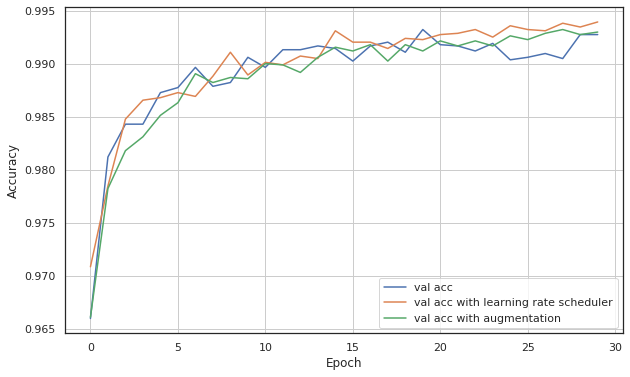

In [125]:
fig = plt.figure(figsize=(10, 6))
plt.plot(cnn_reg_history.history['val_accuracy'], label='val acc')
plt.plot(cnn_lrs_history.history['val_accuracy'], label='val acc with learning rate scheduler')
plt.plot(cnn_aug_history.history['val_accuracy'], label='val acc with augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

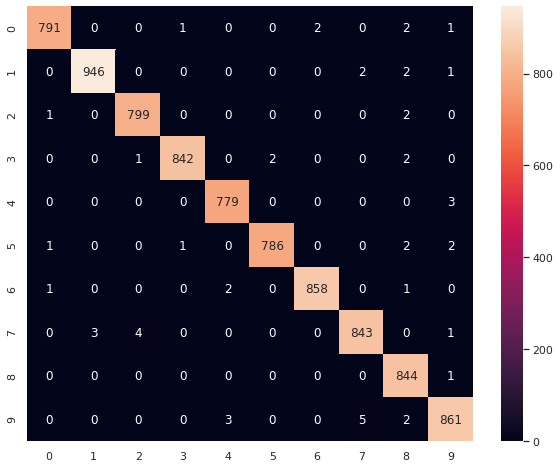

In [126]:
from sklearn.metrics import confusion_matrix

y_pred = cnn_model_lrs.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')

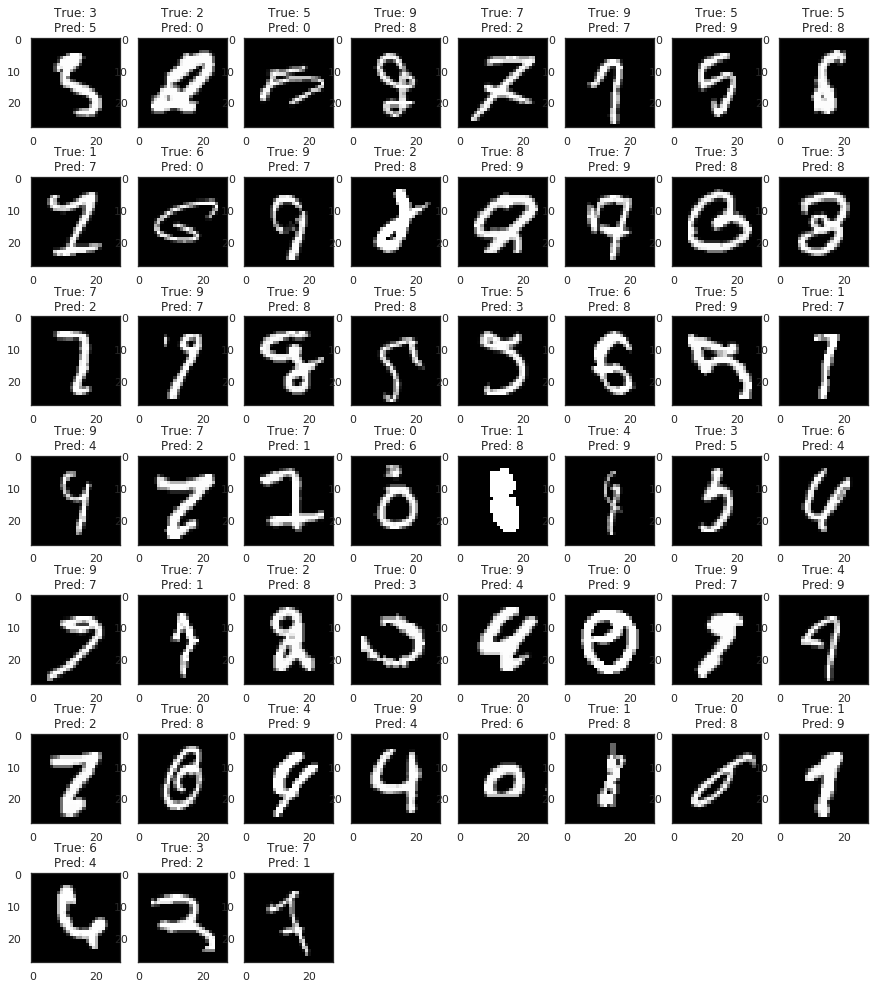

In [174]:
wrong_predictions_ind = np.where(y_pred != y_test)
hard_digits = x_test[wrong_predictions_ind]
    
titles = ['True: {}\nPred: {}'.format(y_test[i], y_pred[i]) for i in wrong_predictions_ind[0]]

plot_n_digits(hard_digits, images_per_row=8, titles=titles)